# 6-6 Stewart Platform Inverse Kinematic
Six legs join the base to the platform in the simplest form of Stewart Platform. They are set up in three sets of two, linked together by universal joints, and controlled in a linear fashion. In this context, "anchors" refer to the points at which the legs are attached to the foundation and the platforms.

## Base and Platform Anchors

Standard notation for the fundamental parameters that determine the mechanical configuration is

- $r_B\to$ Radius of Base (Bottom)

- $r_P\to$ Radius of Platform (Top)

- $\gamma_B\to$ Half of angle between two anchors on the base

- $\gamma_P\to$ Half of angle between two anchors on the platform

We may define $\psi_B \in R^{6 \times 1} ~ \&~ \psi_P\in R^{6 \times 1}$ and the polar coordinates of the anchors on a unit circle radius using these $\gamma_B ~\& ~ \gamma_P$. These are derived from the gamma values of $B ~\&~ P$.

If we have $r_B~\&~ r_P$, then we may define as the coordinates of the anchors in their respective local frames in cartesian space, which are $B \in R^{6 \times 3} ~ \&~ P\in R^{6 \times 3}$. For instance, an illustration of the anchor points on the base B may be found below.

In [1]:
import numpy as np
r_B, r_P, gamma_B, gamma_P = 0.2, 0.2, np.deg2rad(24.6)/2, np.deg2rad(24.6)/2
# 12.4 degrees is the standard gamma_B for stewart platforms

pi = np.pi

## Define the Geometry of the Base
# psi_B (Polar coordinates)
psi_B = np.array([ 
    7*pi/6+gamma_B, 
    7*pi/6-gamma_B,
    pi/2 + gamma_B, 
    pi/2 - gamma_B, 
    11*pi/6 + gamma_B, 
    11*pi/6 - gamma_B  
    ])


# psi_P (Polar coordinates)
# Direction of the points where the rod is attached to the platform.
psi_P = np.array([
    3*pi/2 - gamma_P ,
    5*pi/6 + gamma_P,
    5*pi/6 - gamma_P,
    pi/6+gamma_P, 
    pi/6-gamma_P,
    3*pi/2 + gamma_P, 
    ])

# Coordinate of the points where servo arms 
# are attached to the corresponding servo axis.
B = r_B * np.array( [ 
    [ np.cos(psi_B[0]), np.sin(psi_B[0]), 0],
    [ np.cos(psi_B[1]), np.sin(psi_B[1]), 0],
    [ np.cos(psi_B[2]), np.sin(psi_B[2]), 0],
    [ np.cos(psi_B[3]), np.sin(psi_B[3]), 0],
    [ np.cos(psi_B[4]), np.sin(psi_B[4]), 0],
    [ np.cos(psi_B[5]), np.sin(psi_B[5]), 0] ])
B = np.transpose(B)
    
# Coordinates of the points where the rods 
# are attached to the platform.
P = r_P * np.array([ 
    [ np.cos(psi_P[0]),  np.sin(psi_P[0]), 0],
    [ np.cos(psi_P[1]),  np.sin(psi_P[1]), 0],
    [ np.cos(psi_P[2]),  np.sin(psi_P[2]), 0],
    [ np.cos(psi_P[3]),  np.sin(psi_P[3]), 0],
    [ np.cos(psi_P[4]),  np.sin(psi_P[4]), 0],
    [ np.cos(psi_P[5]),  np.sin(psi_P[5]), 0] ])
P = np.transpose(P)

print('6x3 array for Base anchors \n', B)
print('6x1 array for psi_B \n', psi_B)

print('6x3 array for Platform anchors \n', P)
print('6x1 array for psi_P \n', psi_P)

6x3 array for Base anchors 
 [[-0.14792622 -0.1905323  -0.04260608  0.04260608  0.1905323   0.14792622]
 [-0.1346025  -0.06080661  0.19540911  0.19540911 -0.06080661 -0.1346025 ]
 [ 0.          0.          0.          0.          0.          0.        ]]
6x1 array for psi_B 
 [3.87986693 3.45051593 1.78547182 1.35612083 5.97426203 5.54491103]
6x3 array for Platform anchors 
 [[-0.04260608 -0.1905323  -0.14792622  0.14792622  0.1905323   0.04260608]
 [-0.19540911  0.06080661  0.1346025   0.1346025   0.06080661 -0.19540911]
 [ 0.          0.          0.          0.          0.          0.        ]]
6x1 array for psi_P 
 [4.49771348 2.83266938 2.40331838 0.73827427 0.30892328 4.92706448]


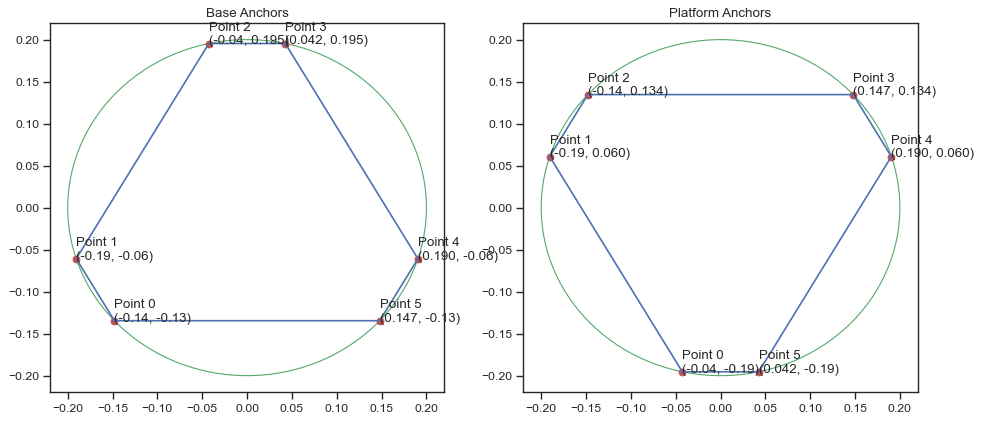

In [2]:
import matplotlib.pyplot as plt
import seaborn

def plot_2D_annotate(X, Y):
    X = list(X)
    Y = list(Y)
    ax.plot(X,Y, 'or')  # Plot Points
    # Annotate Points
    for i, (xy) in enumerate(zip(X, Y)):                                 
        ax.annotate('Point ' + str(i) + '\n(%.5s, %.5s)' % xy, xy=xy, textcoords='data')

    X.append(X[0])
    Y.append(Y[0])
    ax.plot(X,Y)    # Plot lines

seaborn.set(style='ticks')
# plt.style.use('dark_background')

fig = plt.figure(figsize=(14, 6), dpi=80)

ax = fig.add_subplot(121)
ax.set_title('Base Anchors')
plot_2D_annotate(B[0,:], B[1,:])
circle_B = plt.Circle((0, 0), r_B, color='g', fill=False)
ax.add_patch(circle_B)

ax = fig.add_subplot(122)
ax.set_title('Platform Anchors')
plot_2D_annotate(P[0,:], P[1,:])
circle_r = plt.Circle((0, 0), r_P, color='g', fill=False)
ax.add_patch(circle_r)

plt.show()

# Positioning Oneself at Home
The gap between the base and the platform at the starting point,, must then be specified. Your resting linear actuator length is. Let's say it's the base plate radius.

Using the usual notation, we must additionally define the rotation matrices.

- $R_z{(\theta)}=\begin{bmatrix} 
   0 & 0 & 0  \\
   0 & \cos{\theta} & -\sin{\theta}  \\
   1 & \sin{\theta} & \cos{\theta}  \\
   \end{bmatrix} $
- $R_y{(\theta)}=\begin{bmatrix} 
   \cos{\theta} & 0 & \sin{\theta}  \\
   0 &  1 & 0  \\
   -\sin{\theta} & 0 & \cos{\theta}  \\
   \end{bmatrix} $
- $R_x{(\theta)}=\begin{bmatrix} 
   \cos{\theta} & -\sin{\theta} & 0   \\
   \sin{\theta} & \cos{\theta} & 0    \\
   1 & 0 & 0  \\
   \end{bmatrix} $

In [3]:
# # Definition of the platform home position.
home_pos= np.array([0, 0,  2*r_B])

# Allocate for variables
l = np.zeros((3,6))
lll = np.zeros((6))

# Rotation matrices used later
def rotX(theta):
    rotx = np.array([
        [1,     0    ,    0    ],
        [0,  np.cos(theta), -np.sin(theta)],
        [0,  np.sin(theta), np.cos(theta)] ])
    return rotx

def rotY(theta):    
    roty = np.array([
        [np.cos(theta), 0,  np.sin(theta) ],
        [0         , 1,     0       ],
        [-np.sin(theta), 0,  np.cos(theta) ] ])   
    return roty
    
def rotZ(theta):    
    rotz = np.array([
        [ np.cos(theta),-np.sin(theta), 0 ],
        [ np.sin(theta), np.cos(theta), 0 ],
        [   0        ,     0      , 1 ] ])   
    return rotz
    

# Using Linear Actuators to Determine Inverse Kinematics
We may now begin working on the inverse kinematics problem.

Using the target translation vectors $T = (t_x,t_y,t_z)^T$ and the rotation vector $ \theta = (\theta_x, \theta_y, \theta_z)^T $, determine the required leg length.

After the plate has been rotated and translated as desired, all that remains is to determine the new locations of the various anchors.

Given that each leg's job is to establish a connection between the base and the platform's anchor, the required vector (direction and length) for each leg is simply the leg's location in 3D space with respect to its corresponding base anchor.
$$l = T+H+R(\theta)^T \times P-B$$
Where, $T~ \& ~H$ are in  $R^{3 \times 1}$ replicated 6 times to have dimensions  $R^{3 \times 6}$ to facilitate matrix calculations.

It's possible to interpret this as,
$$l = desired~translation+displacement_{base~center,home~pos}+ coordinate~rotation_{global~frame}$$

A leg's length is simply the leg vector's magnitude.
$$|l| = (l_{k,x}^2+l_{k,y}^2+l_{k,z}^2)^{0.5}$$

Simply adding the displacement of each leg's anchor at the ground yields the leg's position relative to the global frame's centre of base.

And that's only to figure out the inverse kinematics of linear actuator-driven Stewart platforms.

In [4]:
# Given input trans, rotation
trans = np.transpose(np.array([0,0,0])) # X, Y, Z
rotation = np.transpose(np.array([0,0,30])) # X, Y, Z

# Get rotation matrix of platform. RotZ* RotY * RotX -> matmul
R = np.matmul( np.matmul(rotZ(rotation[2]), rotY(rotation[1])), rotX(rotation[0]) )
# R = np.matmul( np.matmul(rotX(rotation[0]), rotY(rotation[1])), rotZ(rotation[2]) )

# Get leg length for each leg
leg = np.repeat(trans[:, np.newaxis], 6, axis=1) + np.repeat(home_pos[:, np.newaxis], 6, axis=1) + np.matmul(np.transpose(R), P) - B 
l = np.repeat(trans[:, np.newaxis], 6, axis=1) + np.repeat(home_pos[:, np.newaxis], 6, axis=1) + np.matmul(R, P) - B 
lll = np.linalg.norm(l, axis=0)

# Position of leg in global frame
L = l + B

print('Leg lengths to command in order to achieve desired position of plate: \n', lll)

Leg lengths to command in order to achieve desired position of plate: 
 [0.42913096 0.52509911 0.42913096 0.52509911 0.42913096 0.52509911]


# Visualisation through plotting

With these leg lengths in hand, we can begin to plot the platform!

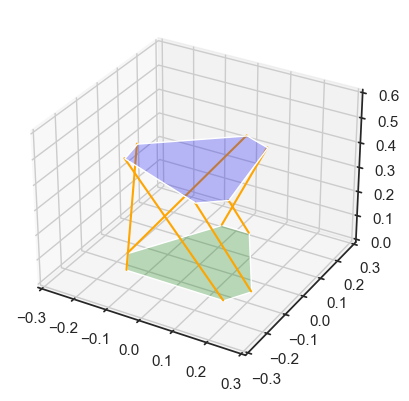

In [5]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot3D_line(ax, vec_arr_origin, vec_arr_dest, color_):
    for i in range(6):
        ax.plot([vec_arr_origin[0, i] , vec_arr_dest[0, i]],
        [vec_arr_origin[1, i], vec_arr_dest[1, i]],
        [vec_arr_origin[2, i],vec_arr_dest[2, i]],
        color=color_)


ax = plt.axes(projection='3d') # Data for a three-dimensional line
ax.set_xlim3d(-0.3, 0.3)
ax.set_ylim3d(-0.3, 0.3)
ax.set_zlim3d(0, 0.6)

# ax.add_collection3d(Poly3DCollection([list(np.transpose(s.B))]), zs='z')
ax.add_collection3d(Poly3DCollection([list(np.transpose(B))], facecolors='green', alpha=0.25))

# ax.add_collection3d(base_plot, zs='z')
ax.add_collection3d(Poly3DCollection([list(np.transpose(L))], facecolors='blue', alpha=0.25))

plot3D_line(ax, B, L, 'orange')
plt.show()

In [6]:
'''
Compute change in leg length
'''
import sys
sys.path.append("..")

from inv_kinematics import inv_kinematics as ik
import numpy as np
# Given input trans, rotation
trans = np.transpose(np.array([0,0,0])) # X, Y, Z
rotation = np.transpose(np.array([0,0,30])) # roll, pitch, yaw
cls = ik(0.2, 0.2, (24.6)/2, (24.6)/2)
l0 = cls.solve(np.array([0,0,0]), np.array([0,0,0]))
l1 = cls.solve(trans, rotation)
print('Leg lengths to command in order to achieve desired position of plate: \n', l1-l0)

Leg lengths to command in order to achieve desired position of plate: 
 [-0.02658078  0.05138022 -0.02658078  0.05138022 -0.02658078  0.05138022]


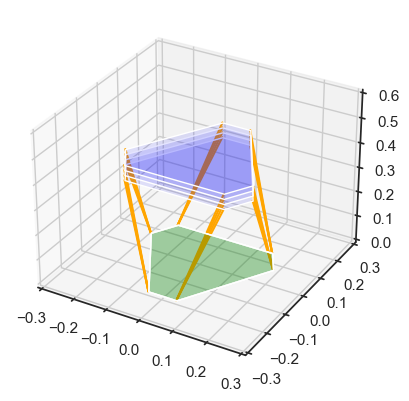

In [7]:
'''
Line plot for leg lengths simulation for a given input of translation and rotation of the platform.
'''
from scipy.interpolate import CubicSpline
res = 5
ax = plt.axes(projection='3d') # Data for a three-dimensional line
ax.set_xlim3d(-0.3, 0.3)
ax.set_ylim3d(-0.3, 0.3)
ax.set_zlim3d(0, 0.6)

ft1 = CubicSpline(np.linspace(0,5,res),np.linspace(0,0,res))
ft2 = CubicSpline(np.linspace(0,5,res),np.linspace(0,0,res))
ft3 = CubicSpline(np.linspace(0,5,res),np.linspace(0,0,res))
fx = CubicSpline(np.linspace(0,5,res),np.linspace(0,0,res))
fy = CubicSpline(np.linspace(0,5,res),np.linspace(0,0,res))
fz = CubicSpline(np.linspace(0,5,res),np.linspace(0.09,0.19,res))
for i in range(1,res):
    l0 = cls.solve(np.array([fx(i),fy(i),fz(i)]), np.array([ft1(i),ft2(i),ft3(i)]))
    # ax.add_collection3d(Poly3DCollection([list(np.transpose(s.B))]), zs='z')
    ax.add_collection3d(Poly3DCollection([list(np.transpose(cls.B))], facecolors='green', alpha=0.1))

    # ax.add_collection3d(base_plot, zs='z')
    ax.add_collection3d(Poly3DCollection([list(np.transpose(cls.L))], facecolors='blue', alpha=0.1))

    plot3D_line(ax, cls.B, cls.L, 'orange')
plt.show()

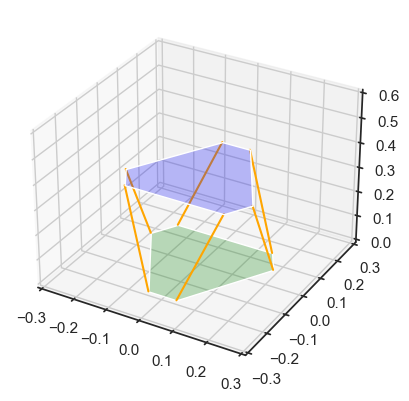

In [8]:
'''
Line plot for leg lengths simulation for a given input of translation and rotation of the platform.
'''
from scipy.interpolate import CubicSpline
res = 2
ax = plt.axes(projection='3d') # Data for a three-dimensional line
ax.set_xlim3d(-0.3, 0.3)
ax.set_ylim3d(-0.3, 0.3)
ax.set_zlim3d(0, 0.6)

ft1 = CubicSpline(np.linspace(0,1,res),np.linspace(0,0,res))
ft2 = CubicSpline(np.linspace(0,1,res),np.linspace(0,0,res))
ft3 = CubicSpline(np.linspace(0,1,res),np.linspace(0,0,res))
fx = CubicSpline(np.linspace(0,1,res),np.linspace(0,0,res))
fy = CubicSpline(np.linspace(0,1,res),np.linspace(0,0,res))
fz = CubicSpline(np.linspace(0,1,res),np.linspace(0.09,0.09,res))
for i in range(1,res):
    l0 = cls.solve(np.array([fx(i),fy(i),fz(i)]), np.array([ft1(i),ft2(i),ft3(i)]))
    # ax.add_collection3d(Poly3DCollection([list(np.transpose(s.B))]), zs='z')
    ax.add_collection3d(Poly3DCollection([list(np.transpose(cls.B))], facecolors='green', alpha=0.25))

    # ax.add_collection3d(base_plot, zs='z')
    ax.add_collection3d(Poly3DCollection([list(np.transpose(cls.L))], facecolors='blue', alpha=0.25))

    plot3D_line(ax, cls.B, cls.L, 'orange')
plt.show()

In [9]:
import numpy as np
# Roll, pitch and yaw angles of the platform
rot1 = np.array([0, 0, 30]) # 30 degrees yaw
rot2 = np.array([0, 30, 0]) # 30 degrees pitch
rot3 = np.array([30, 0, 0]) # 30 degrees roll

# Translation of the platform
trans = np.array([0, 0, 0]) # 9 cm in z axis

# Time to reach the desired position
time1,time2, time3 = 3,5,4 # seconds

data = [[rot1,trans,time1],[rot2,trans,time2],[rot3, trans, time3]]
for i in data:
    print(i)

[array([ 0,  0, 30]), array([0, 0, 0]), 3]
[array([ 0, 30,  0]), array([0, 0, 0]), 5]
[array([30,  0,  0]), array([0, 0, 0]), 4]


In [10]:
def draw_3d_spiral(num_points=10, num_turns=2, radius=0.05, height=0.009):
    # Generate spiral points
    t = np.linspace(0, num_turns * 2 * np.pi, num_points)
    x = radius * np.cos(t)
    y = radius * np.sin(t)
    z = height * (t / (2 * np.pi))

    # Plot spiral
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z+2*r_B)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    return x,y,z

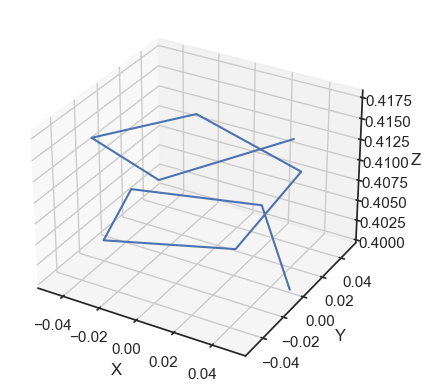

In [11]:
x,y,z = draw_3d_spiral()

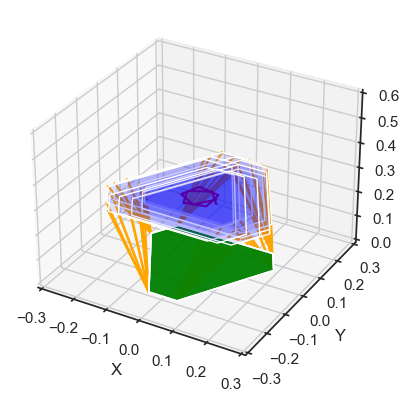

In [12]:
ax = plt.axes(projection='3d') # Data for a three-dimensional line
ax.set_xlim3d(-0.3, 0.3)
ax.set_ylim3d(-0.3, 0.3)
ax.set_zlim3d(0, 0.6)
for i in range(len(x)):
    l0 = cls.solve(np.array([x[i],y[i],z[i]]), np.array([0,0,0]))
    # ax.add_collection3d(Poly3DCollection([list(np.transpose(cls.B))]), zs='z')
    ax.add_collection3d(Poly3DCollection([list(np.transpose(cls.B))], facecolors='green', alpha=0.25))

    # ax.add_collection3d(base_plot, zs='z')
    ax.add_collection3d(Poly3DCollection([list(np.transpose(cls.L))], facecolors='blue', alpha=0.1))

    plot3D_line(ax, cls.B, cls.L, 'orange')

# ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z+0.257547, color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
plt.show()